In [2]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
sys.path.append('..')
from data_tools import audio_files_to_numpy, numpy_audio_to_matrix_spectrogram
from data_display import make_3plots_spec_voice_noise, make_3plots_timeseries_voice_noise
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import IPython.display as ipd

# Sample rate chosen to read audio
sample_rate = 8000

# Minimum duration of audio files to consider
min_duration = 2.0

# Our training data will be frame of slightly above 1 second
frame_length = 8064

# hop length for clean voice files separation (no overlap)
hop_length_frame = 8064

# Choosing n_fft and hop_length_fft to have squared spectrograms
n_fft = 255
hop_length_fft = 63

dim_square_spec = int(n_fft / 2) + 1


validation_folder_ex = './sample_audio_validation'


# Bells example

In [3]:
list_files = ['noisy_voice_bells.wav','voice_pred_bells.wav','voice_bells.wav']

### Noisy voice

In [4]:
noisy_voice_bells, sr = librosa.load(os.path.join(validation_folder_ex,list_files[0]), sr=sample_rate)
ipd.Audio(noisy_voice_bells, rate=8000)

### Predicted clean voice

In [5]:
voice_pred_bells, sr = librosa.load(os.path.join(validation_folder_ex,list_files[1]), sr=sample_rate)
ipd.Audio(voice_pred_bells, rate=8000)

### True clean voice

In [6]:
voice_bells, sr = librosa.load(os.path.join(validation_folder_ex,list_files[2]), sr=sample_rate)
ipd.Audio(voice_bells, rate=8000)

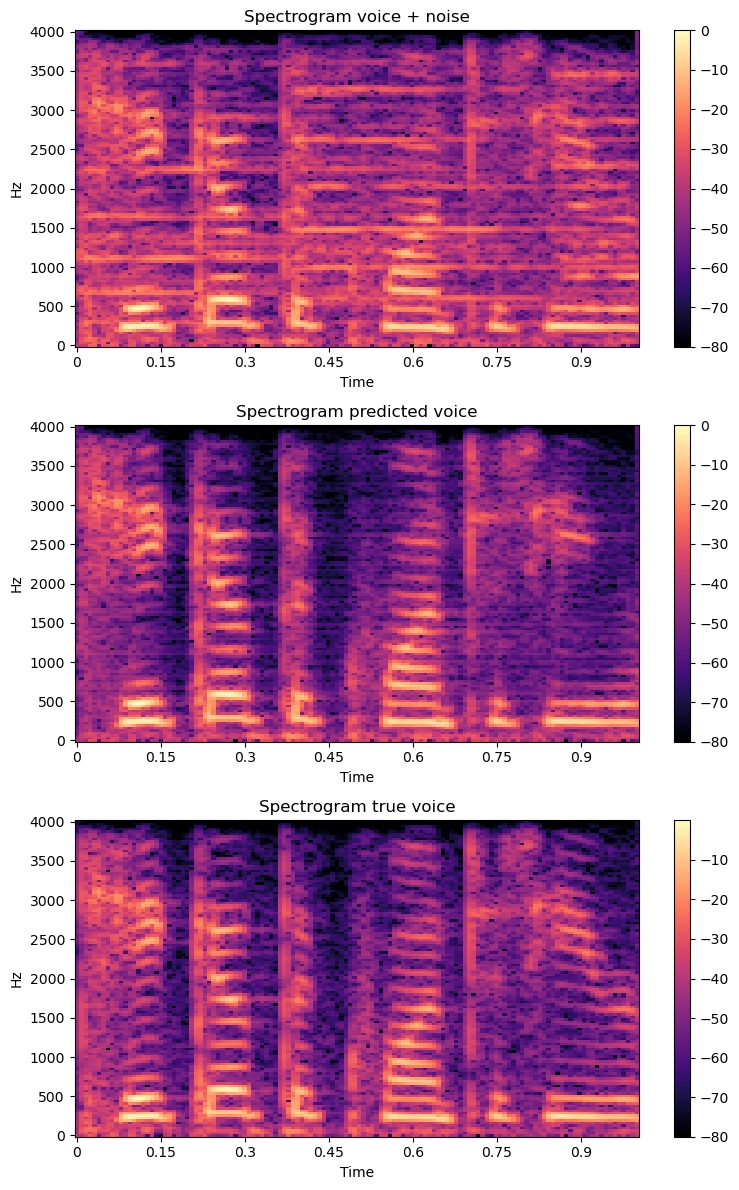

In [8]:
m_amp_db_noisy_voice,  m_pha_noisy_voice =  numpy_audio_to_matrix_spectrogram (noisy_voice_bells.reshape(1,8064), dim_square_spec, n_fft, hop_length_fft)

m_amp_db_voice_pred,  m_pha_voice_pred =  numpy_audio_to_matrix_spectrogram (voice_pred_bells.reshape(1,8064), dim_square_spec, n_fft, hop_length_fft)

m_amp_db_voice_true,  m_pha_voice_true =  numpy_audio_to_matrix_spectrogram (voice_bells.reshape(1,8064), dim_square_spec, n_fft, hop_length_fft)

make_3plots_spec_voice_noise(m_amp_db_noisy_voice[0,:,:],m_amp_db_voice_pred[0,:,:],m_amp_db_voice_true[0,:,:],sample_rate, hop_length_fft)


In [9]:
m_amp_db_voice_true.shape

(1, 128, 128)

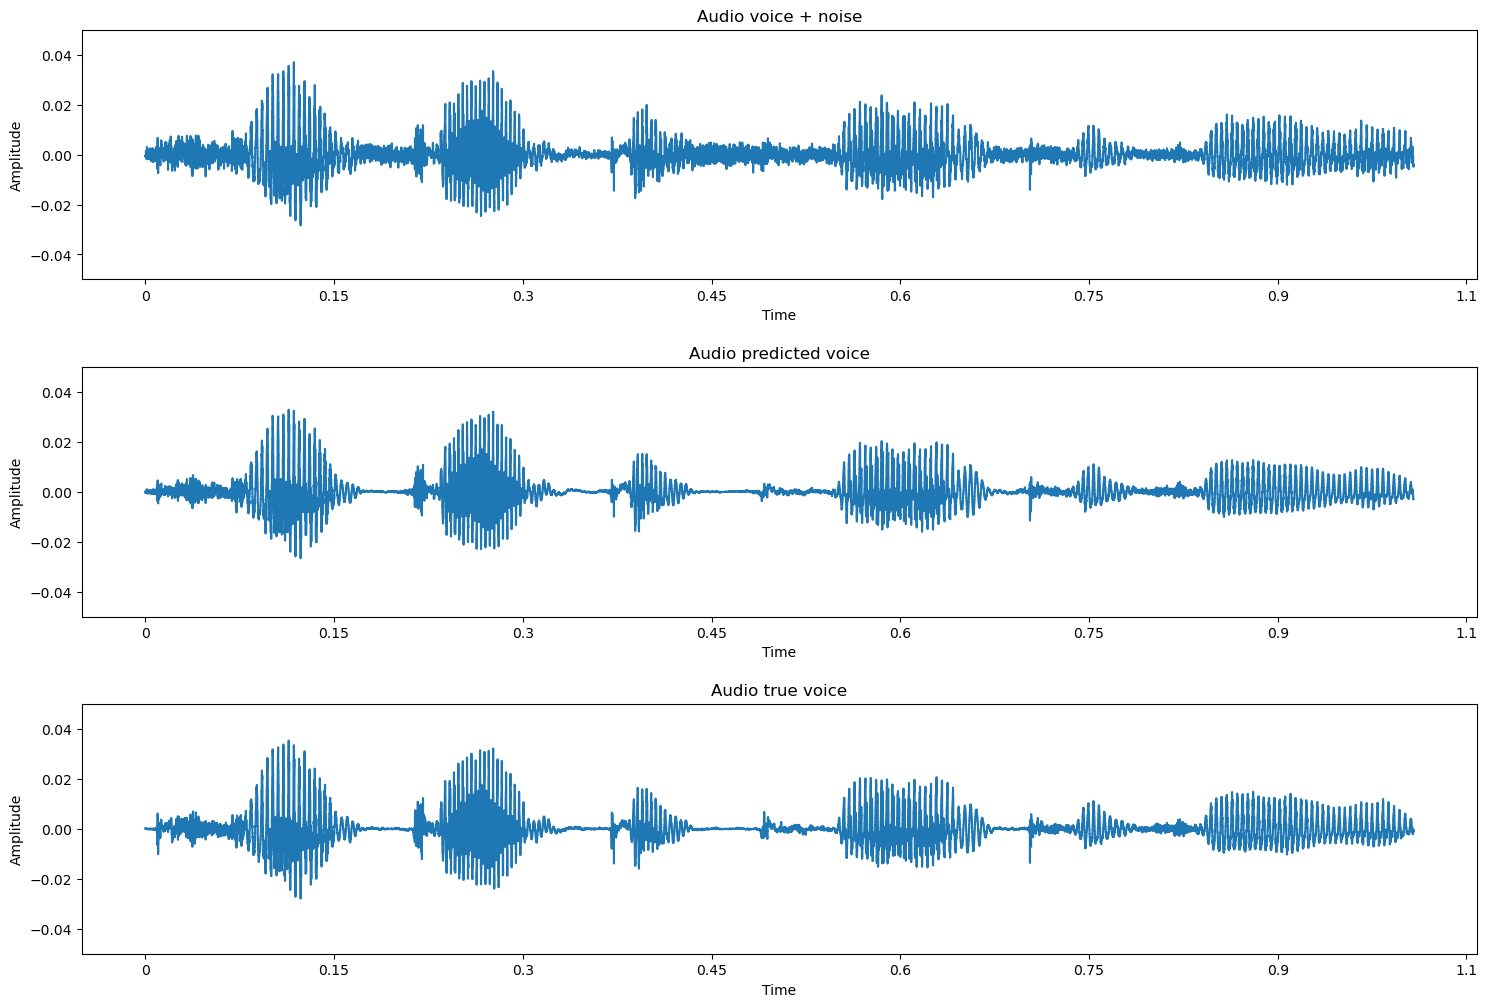

In [10]:
make_3plots_timeseries_voice_noise(noisy_voice_bells,voice_pred_bells,voice_bells, sample_rate)


# Vaccum cleaner example

In [11]:
list_files = ['noisy_voice_vaccum.wav','voice_pred_vaccum.wav','voice_vaccum.wav']

### Noisy voice

In [12]:
noisy_voice_vaccum, sr = librosa.load(os.path.join(validation_folder_ex,list_files[0]), sr=sample_rate)
ipd.Audio(noisy_voice_vaccum, rate=8000)

### Predicted clean voice

In [13]:
voice_pred_vaccum, sr = librosa.load(os.path.join(validation_folder_ex,list_files[1]), sr=sample_rate)
ipd.Audio(voice_pred_vaccum, rate=8000)

### True clean voice

In [14]:
voice_vaccum, sr = librosa.load(os.path.join(validation_folder_ex,list_files[2]), sr=sample_rate)
ipd.Audio(voice_vaccum, rate=8000)

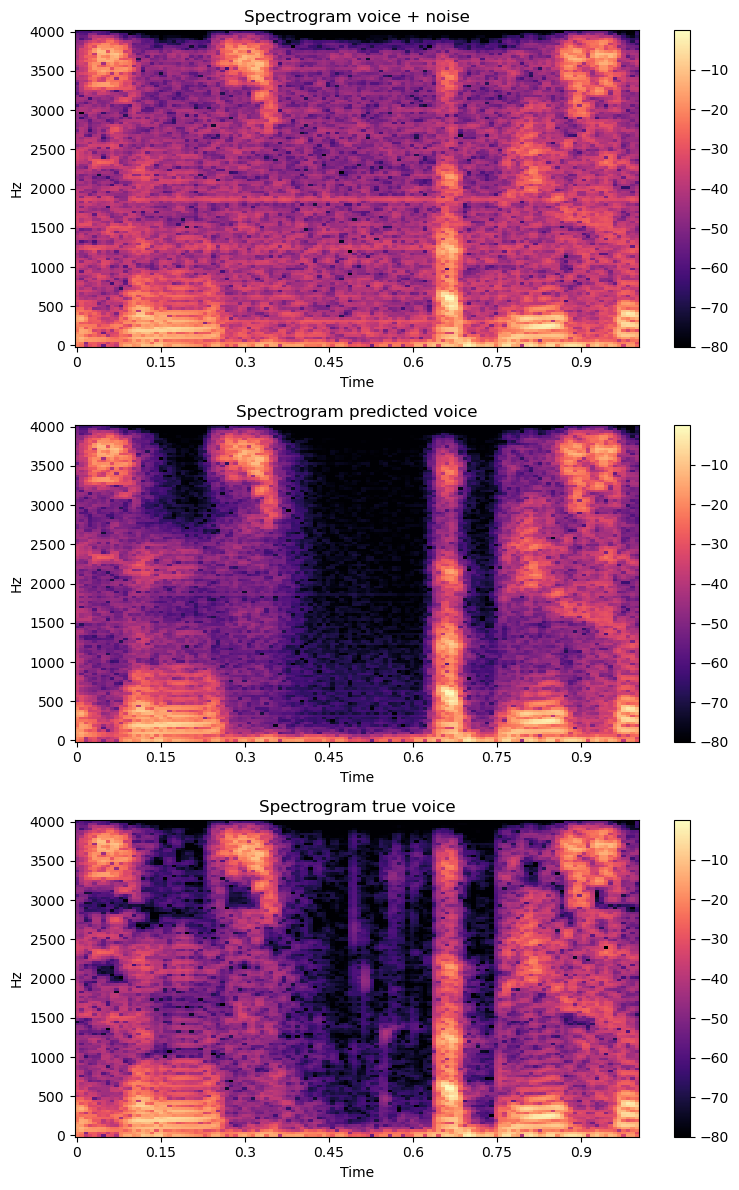

In [15]:
m_amp_db_noisy_voice,  m_pha_noisy_voice =  numpy_audio_to_matrix_spectrogram (noisy_voice_vaccum.reshape(1,8064), dim_square_spec, n_fft, hop_length_fft)

m_amp_db_voice_pred,  m_pha_voice_pred =  numpy_audio_to_matrix_spectrogram (voice_pred_vaccum.reshape(1,8064), dim_square_spec, n_fft, hop_length_fft)

m_amp_db_voice_true,  m_pha_voice_true =  numpy_audio_to_matrix_spectrogram (voice_vaccum.reshape(1,8064), dim_square_spec, n_fft, hop_length_fft)

make_3plots_spec_voice_noise(m_amp_db_noisy_voice[0,:,:],m_amp_db_voice_pred[0,:,:],m_amp_db_voice_true[0,:,:],sample_rate, hop_length_fft)

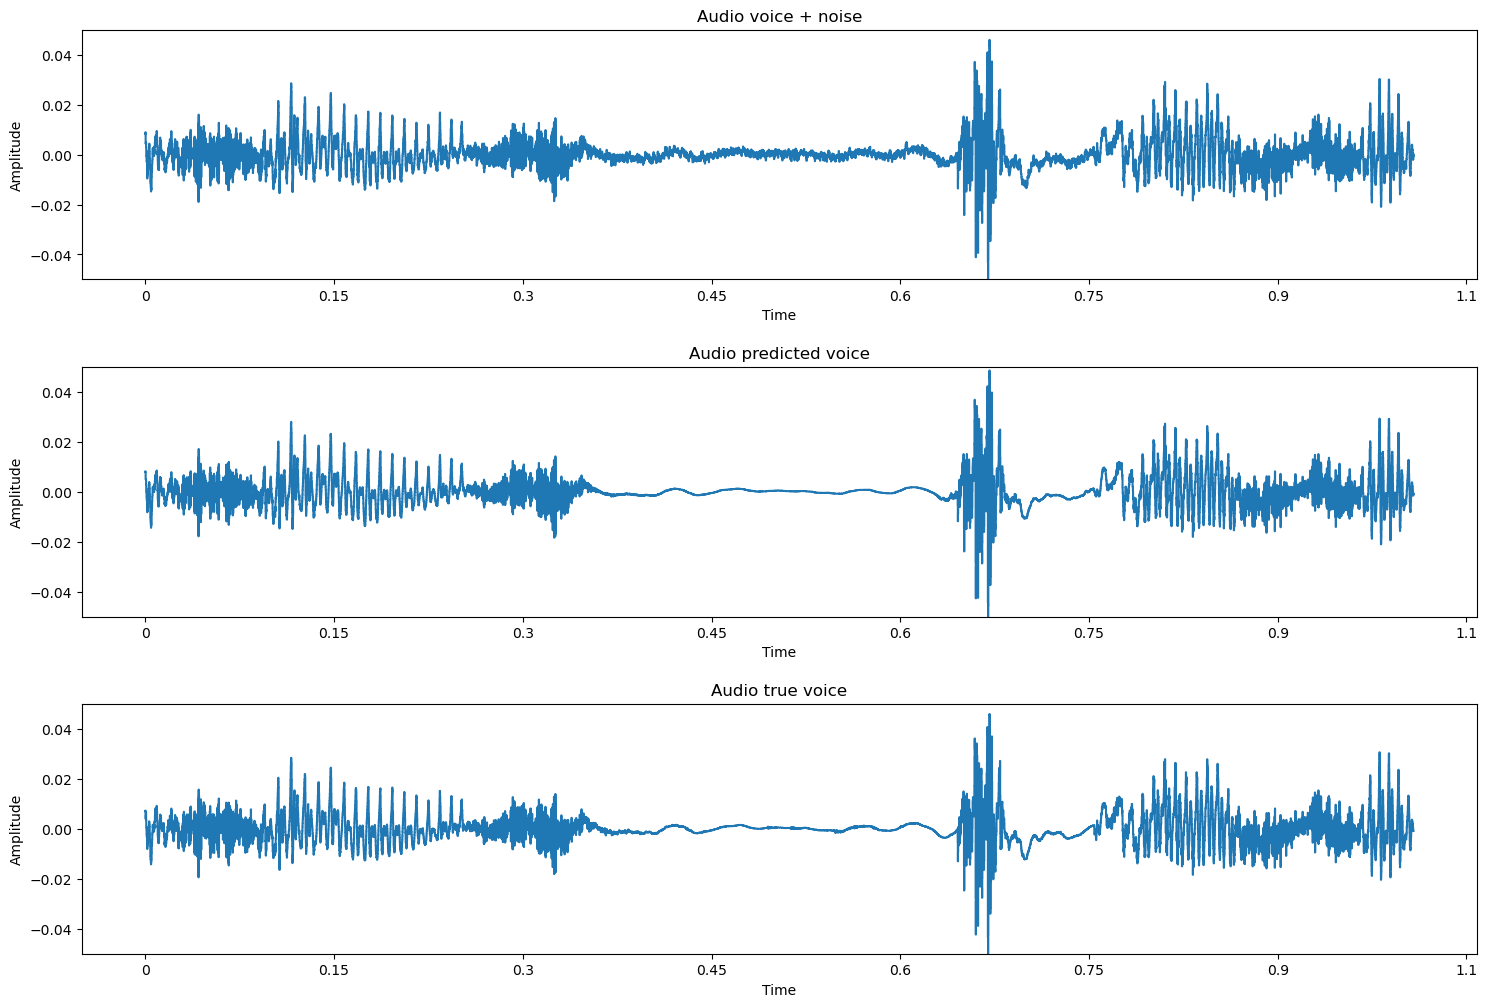

In [16]:
make_3plots_timeseries_voice_noise(noisy_voice_vaccum,voice_pred_vaccum,voice_vaccum, sample_rate)

# Blind test  examples

## Example 1

### Noisy voice

In [35]:
# Noisy voice:
noisy_voice_ex2, sr = librosa.load('./test/mixed_christmas.wav', sr=sample_rate)
ipd.Audio(noisy_voice_ex2, rate=8000)

### Predicted denoise

In [43]:
# Predicted denoise: (created running the program on prediction mode with provided weights)
pred_voice_ex2, sr = librosa.load('./save_predictions/out_mixed_christmas.wav', sr=sample_rate)
ipd.Audio(pred_voice_ex2, rate=8000)